# Cell Type Annotation

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
import seaborn as sns
import json

plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
# load data
adata = sc.read("/home/h/hollenberg/MaPra/adata_processed_2_lea.h5ad")

In [46]:
# load marker genes -> harmonised
with open('marker_genes.json') as json_file:
    marker_genes = json.load(json_file)

In [47]:
# Create a new hashmap to store the missing genes
missing_genes = {}

# Check if the genes from the marker_genes hashmap are present in andata.var_names
for cell_type, genes in marker_genes.items():
    missing_genes[cell_type] = []
    for gene in genes:
        if gene not in adata.var_names:
            if gene == 'Clec4c':
                updated_gene = 'Clec4b1'
                print(f"Gene 'Clec4c' for cell type '{cell_type}' has been replaced with 'Clec4b1'.")
            elif gene == 'Pecam4':
                updated_gene = 'Pecam1'
                print(f"Gene 'Pecam4' for cell type '{cell_type}' has been replaced with 'Pecam1'.")
            else:
                updated_gene = gene
                missing_genes[cell_type].append(gene)
            updated_marker_genes.setdefault(cell_type, []).append(updated_gene)

# Print the missing genes
for cell_type, genes in missing_genes.items():
    if len(genes) > 0:
        print(f"The following genes for cell type '{cell_type}' are not present in andata.var_names:")
        print(genes)
        print()

# Remove duplicate genes in updated_marker_genes
for cell_type, genes in updated_marker_genes.items():
    updated_marker_genes[cell_type] = list(set(genes))


Gene 'Clec4c' for cell type 'Dendritic cells pDC' has been replaced with 'Clec4b1'.
Gene 'Pecam4' for cell type 'Endothelial' has been replaced with 'Pecam1'.


AT1:


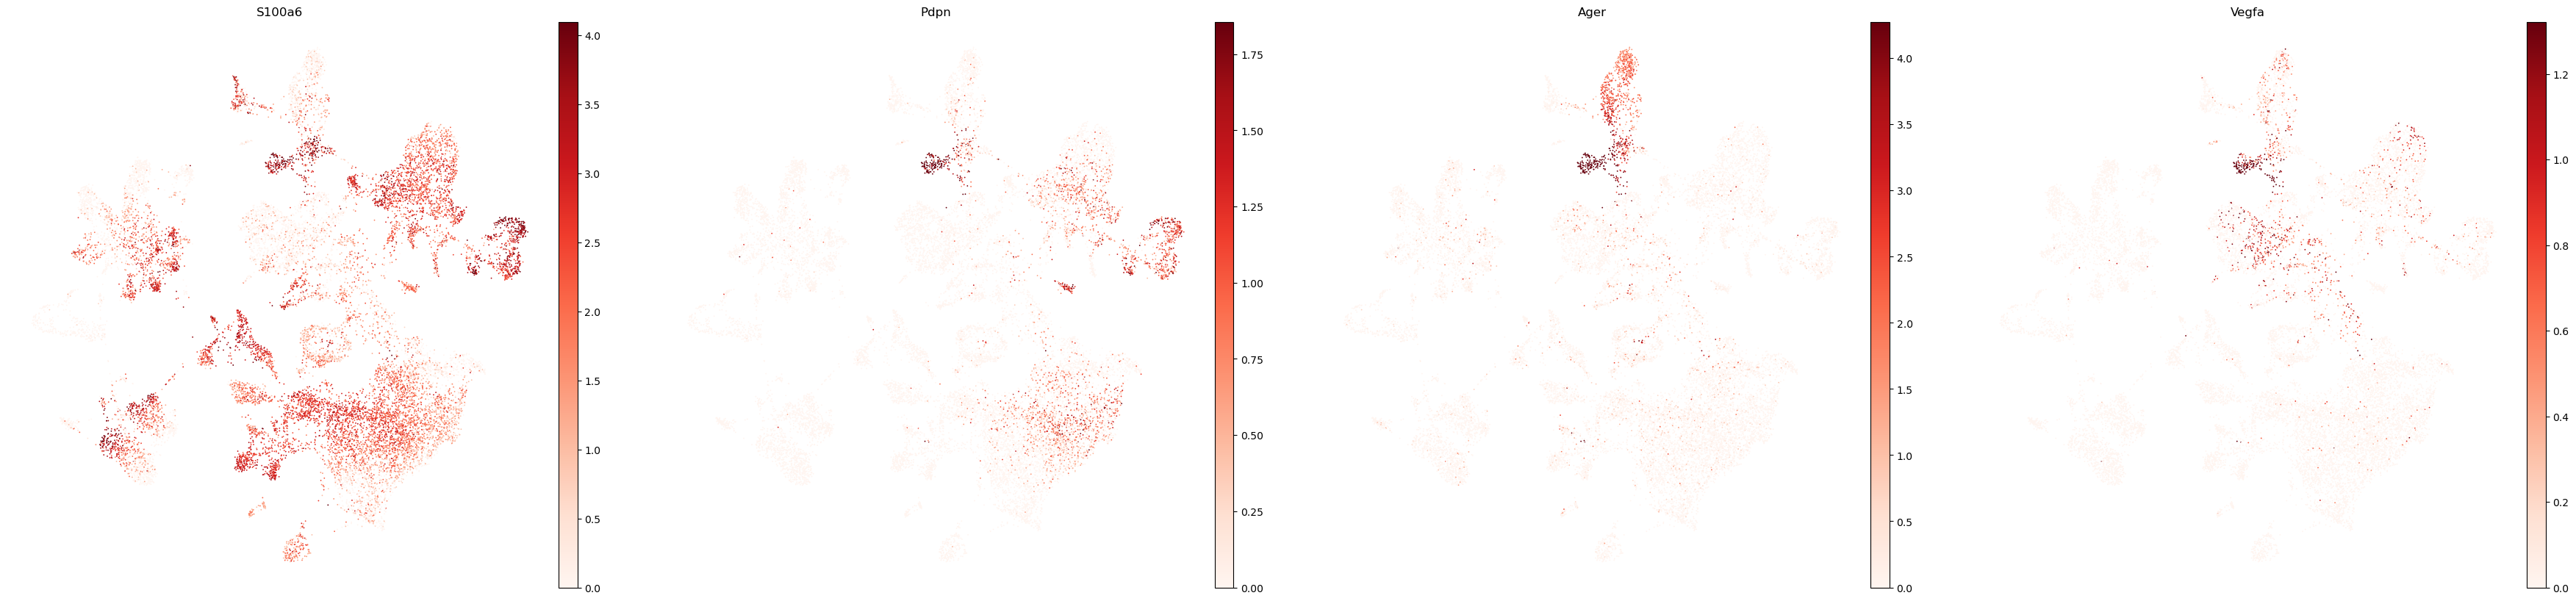

AT2:


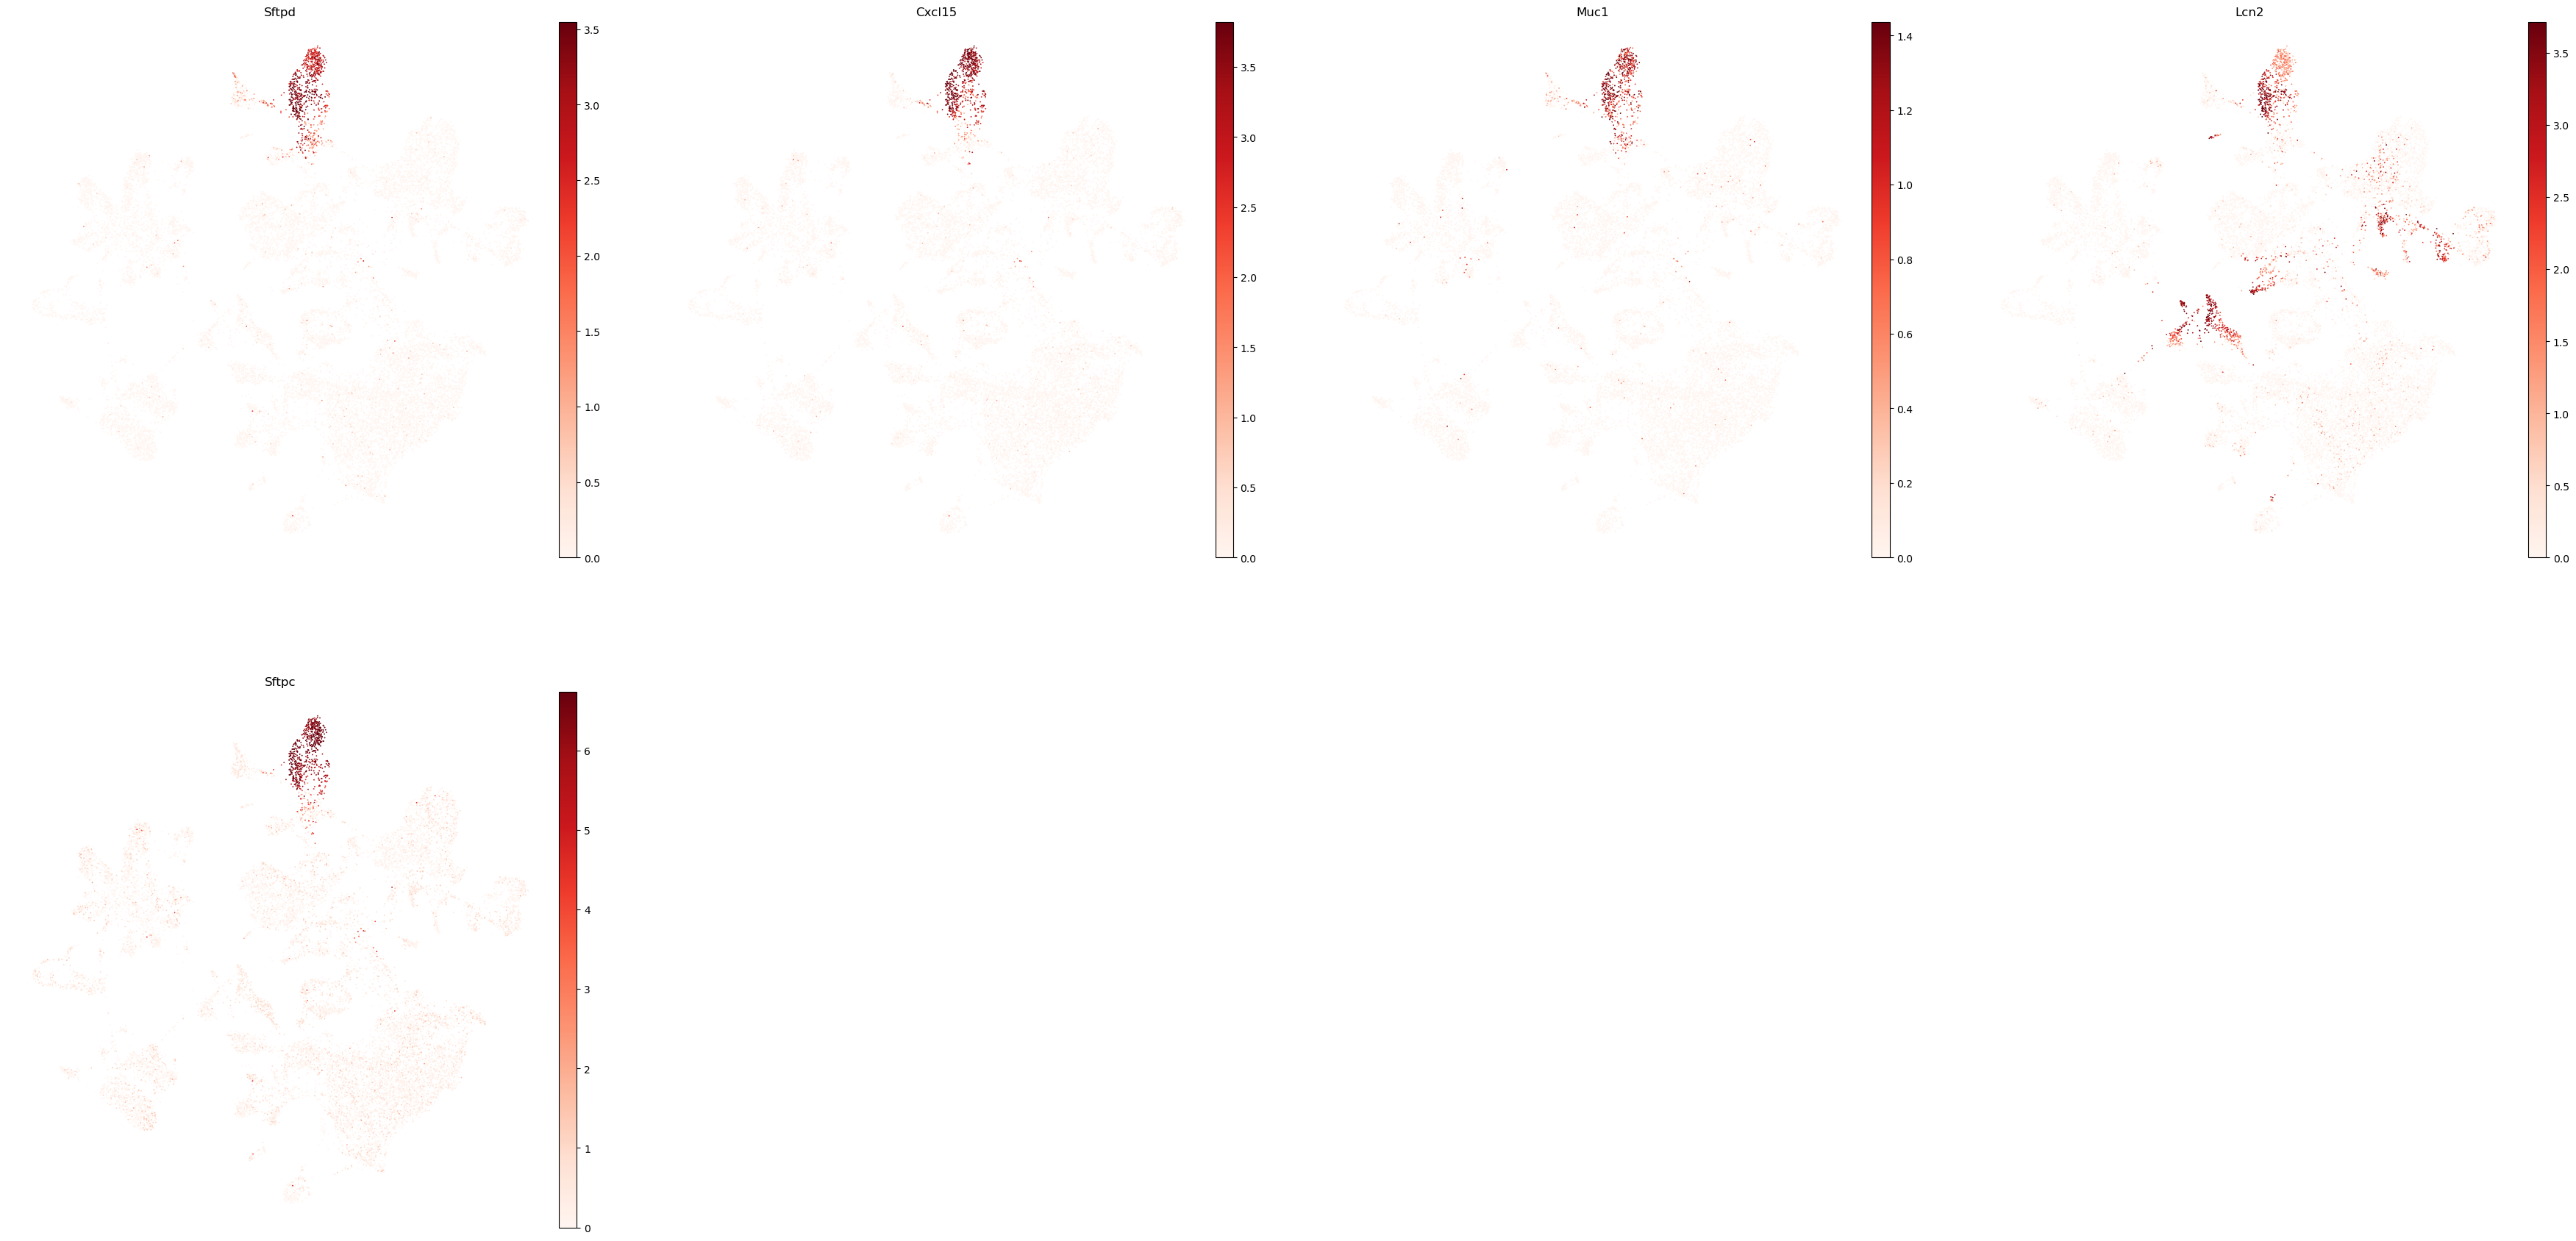

TRANSITIONING EPITHELIAL:


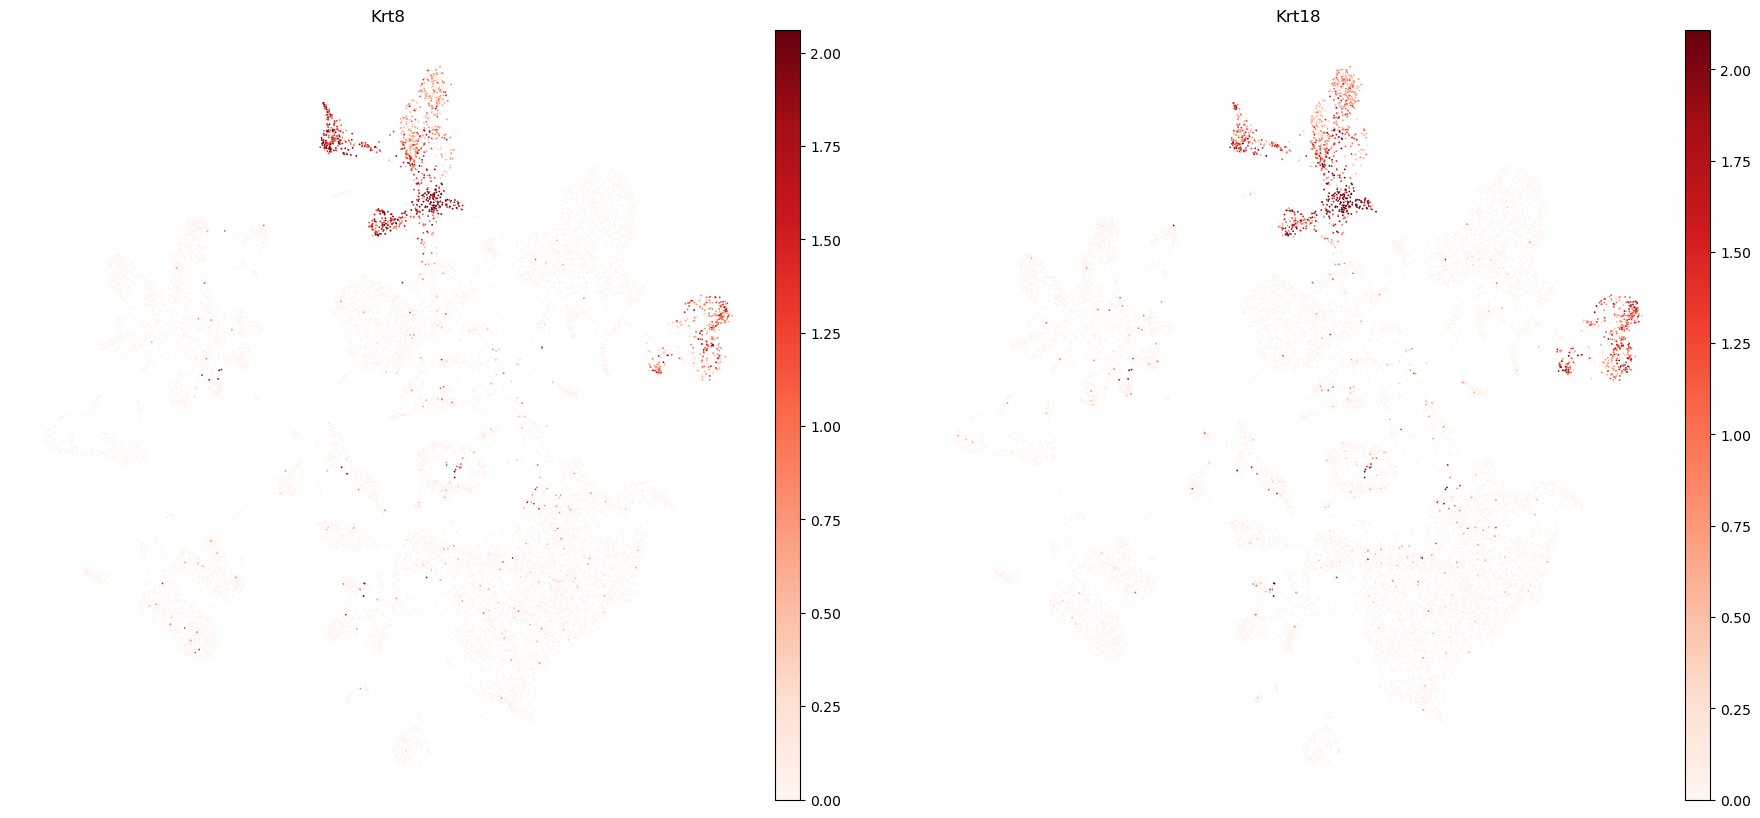

EPITHELIAL:


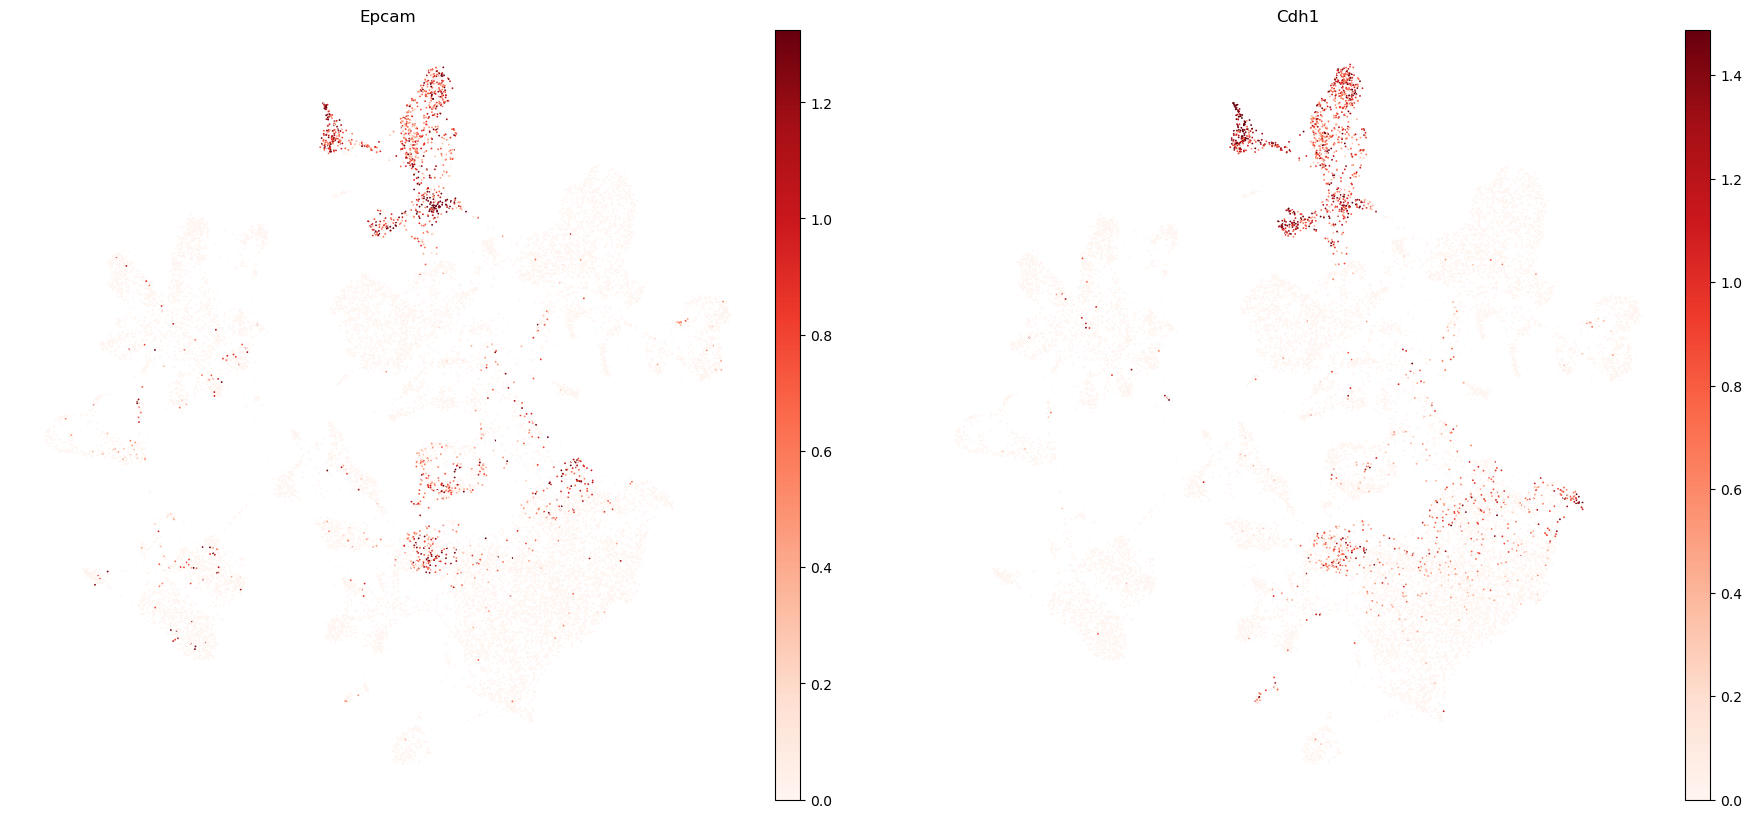

ALVEOLAR MACROPHAGES:


In [ ]:
for ct in updated_marker_genes.keys():
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=updated_marker_genes[ct],
        vmin=0,
        vmax="p99",
        sort_order=False,
        frameon=False,
        cmap="Reds",
    )

## resolution=0.2

In [ ]:
sc.tl.leiden(adata, resolution=0.2)
sc.pl.umap(adata, color='leiden', size=20, legend_loc='on data')

In [ ]:
sc.pl.dotplot(
    adata,
    groupby="leiden",
    var_names=updated_marker_genes,
    standard_scale="var",
    #var_group_positions = var_group_positions
)

In [ ]:
cl_annotation_coarse = {
    "0": "Macrophages",
    "1": "Endothelial",
    "2": "Fibroblast",
    "3": "T-cells",
    "4": "B-cells",
    "5": "Epithelial",
    "6": "Monocytes", 
    "7": "Dendritic cell CCR7",
    "8": "Lymphatic endothelial",
    "9": "Dendritic cells",  
    "10": "T-cells",
    "11": "Transitioning epithelial",
    "12": "Aerocytes",
    "13": "CD4 T-cells",
    "14": "B-cells",
    "15": "Lymphatic endothelial",
    "16": "Epithelial" 
}

In [9]:
adata.obs["manual_celltype_annotation_coarse"] = adata.obs.leiden.map(cl_annotation_coarse).astype("category")

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


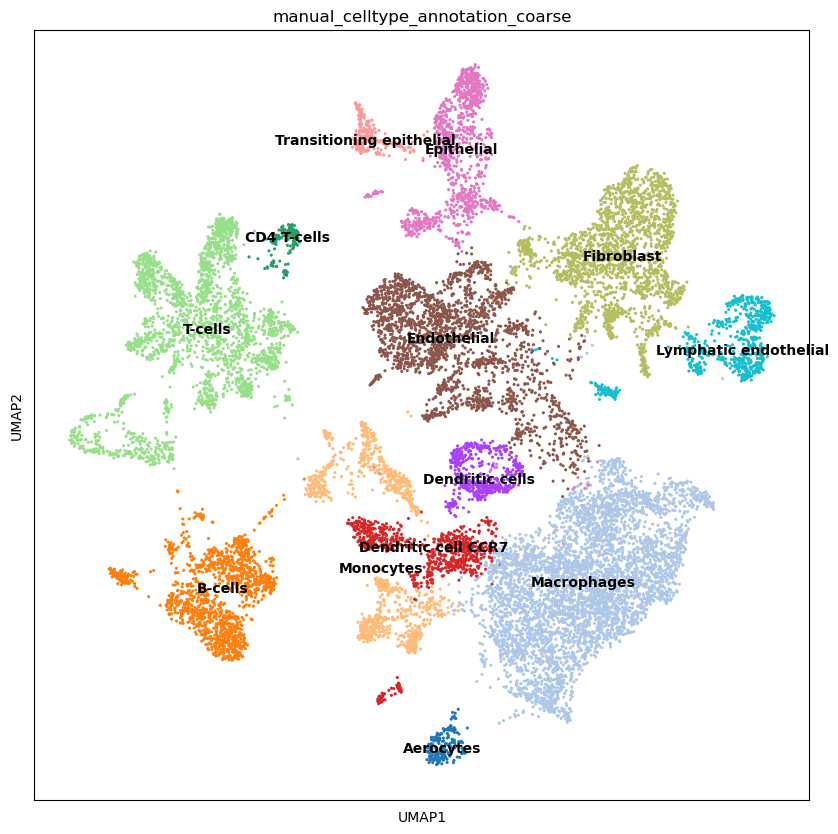

In [10]:
sc.pl.umap(adata, color="manual_celltype_annotation_coarse", size = 20, legend_loc="on data")

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


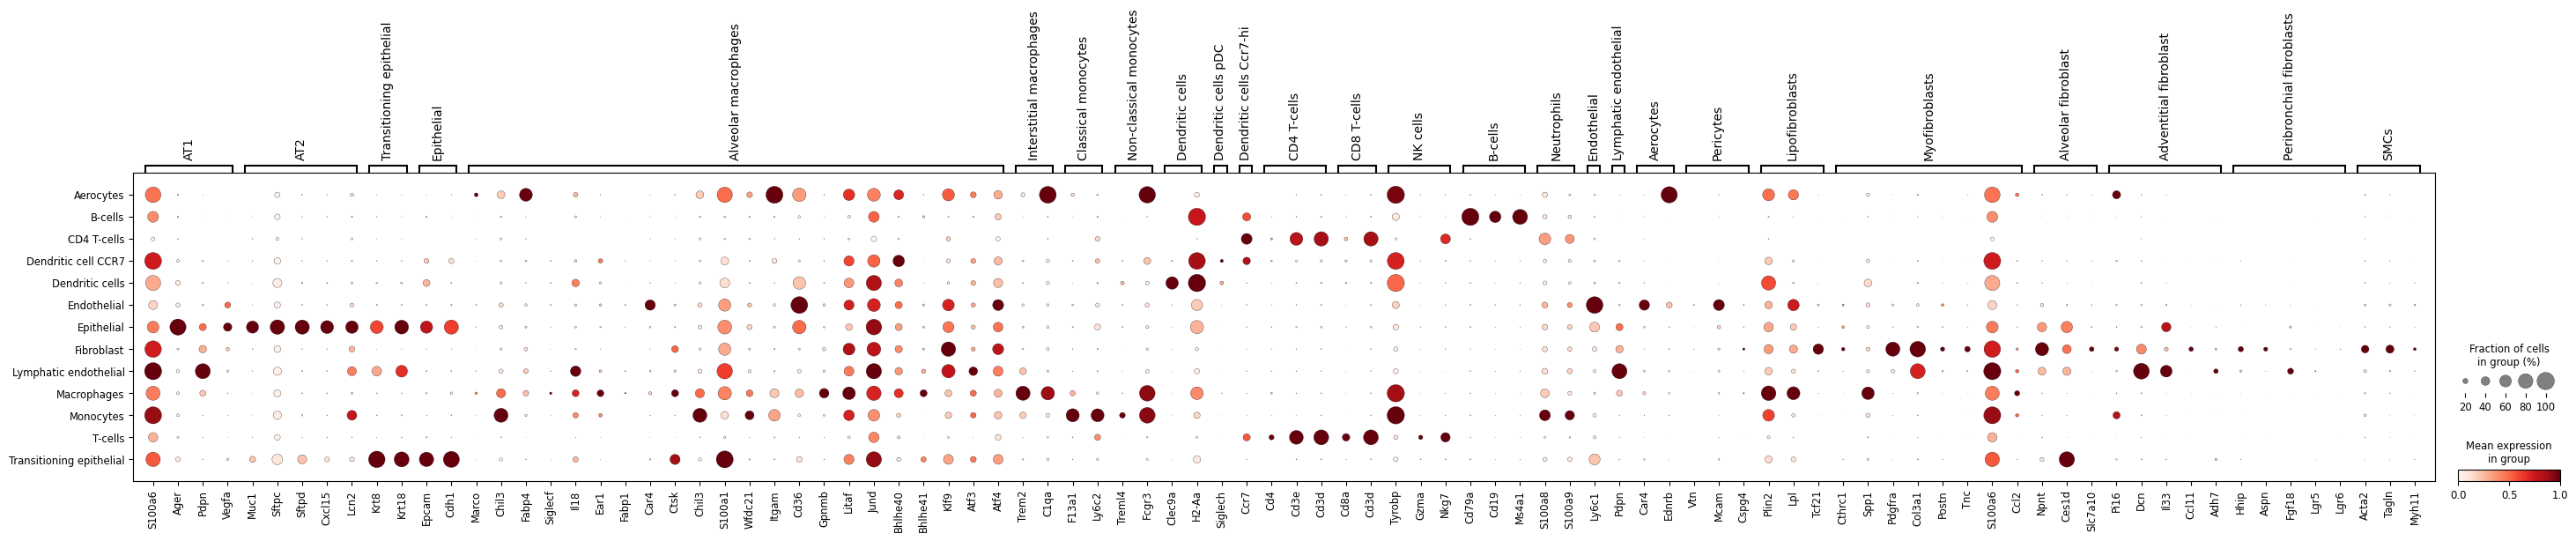

In [19]:
sc.pl.dotplot(
    adata,
    groupby="manual_celltype_annotation_coarse",
    var_names=updated_marker_genes,
    standard_scale="var",
    #var_group_positions = var_group_positions
)

## resolution=0.3

In [11]:
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFFF33', '#A65628', '#F781BF', '#999999', '#FFB3B3', '#B3CCFF', '#CCFFCC', '#FFCC99', '#FFFF99', '#CC99FF', '#E5C494', '#8C8C8C', '#FF6666', '#6699FF', '#66FF99', '#FFFF66', '#9966FF']

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


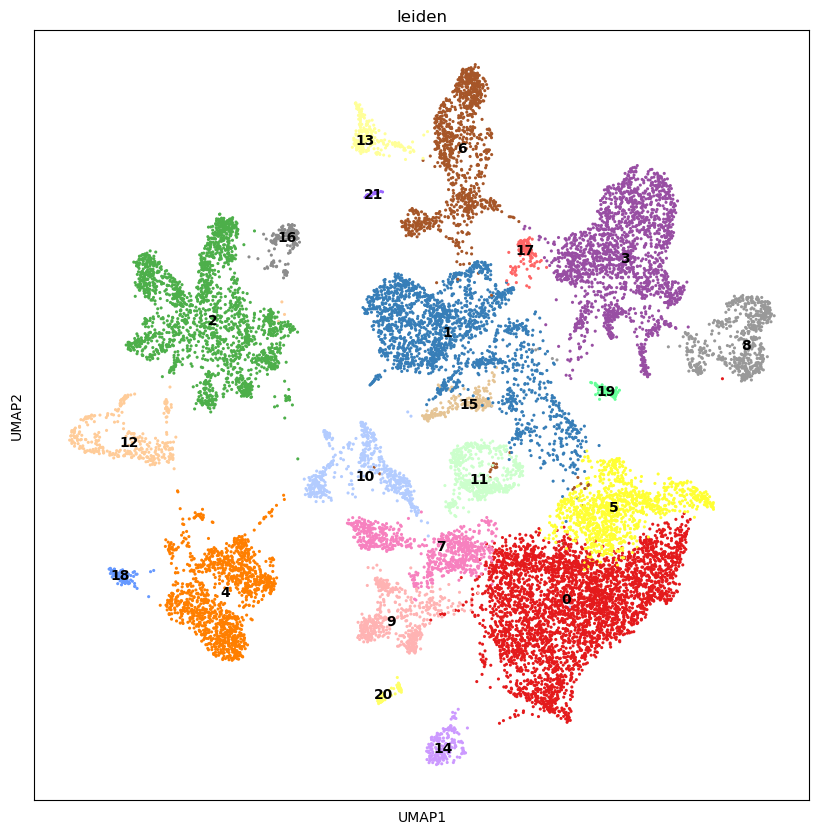

In [12]:
sc.tl.leiden(adata, resolution=0.3)
sc.pl.umap(adata, color='leiden', size=20, palette=colors[:22], legend_loc='on data')

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


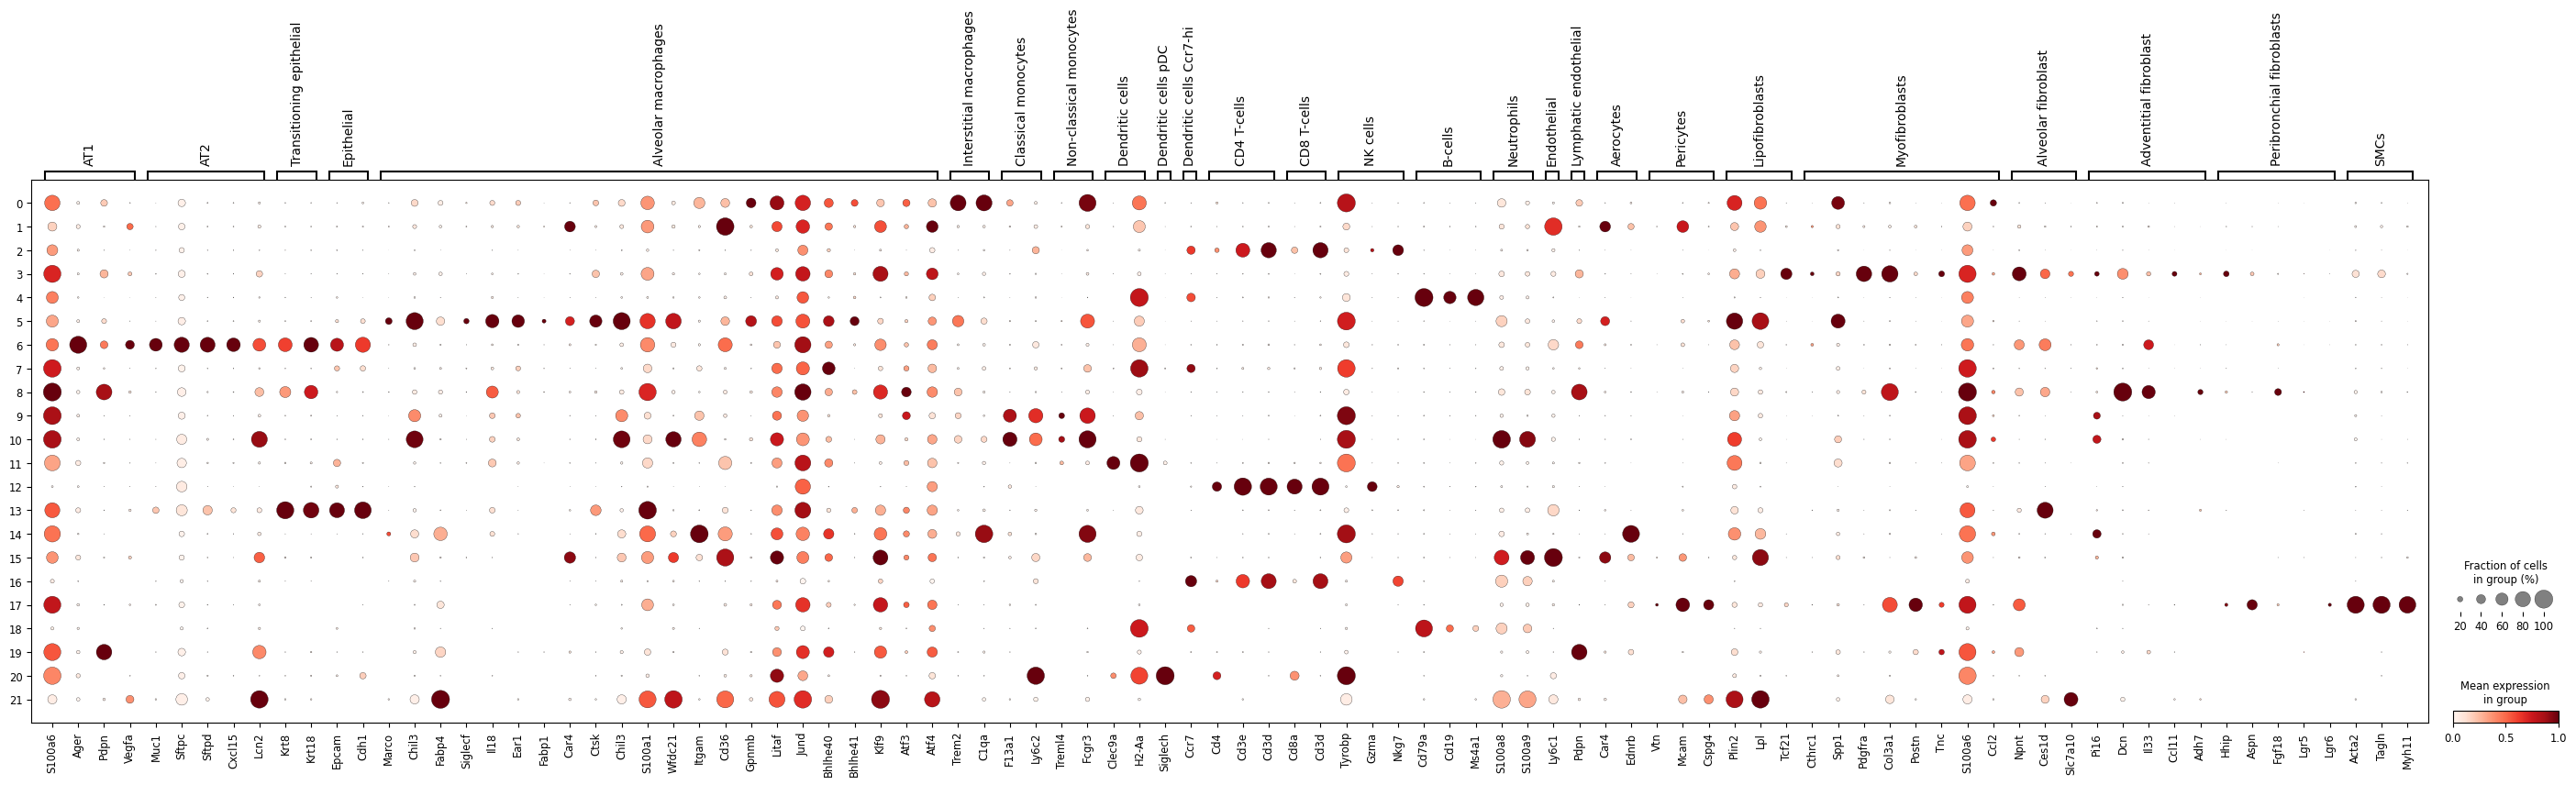

In [13]:
sc.pl.dotplot(
    adata,
    groupby="leiden",
    var_names=updated_marker_genes,
    standard_scale="var",
    #var_group_positions = var_group_positions
)

In [14]:
cl_annotation_precise = {
    "0": "Interstitial Macrophage",
    "1": "Endothelial",
    "2": "CD4 T-cells",
    "3": "Adventitial fibroblast",
    "4": "B-cells",
    "5": "Alveolar macrophages",
    "6": "Epithelial", 
    "7": "Dendritic cell CCR7",
    "8": "Lymphatic endothelial",
    "9": "Classical monocytes",  
    "10": "Neutrophils",
    "11": "Dendritic cells",
    "12": "T-Cells",
    "13": "Transitioning epithelial",
    "14": "Aerocytes",
    "15": "Endothelial",
    "16": "CD4 T-cells",
    "17": "SMCS",
    "18": "B-cells",
    "19": "Lymphatic endothelial",  
    "20": "Dendritic cells pDC",
    "21": "Epithelial",  
}

In [15]:
adata.obs["manual_celltype_annotation_precise"] = adata.obs.leiden.map(cl_annotation_precise).astype("category")

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


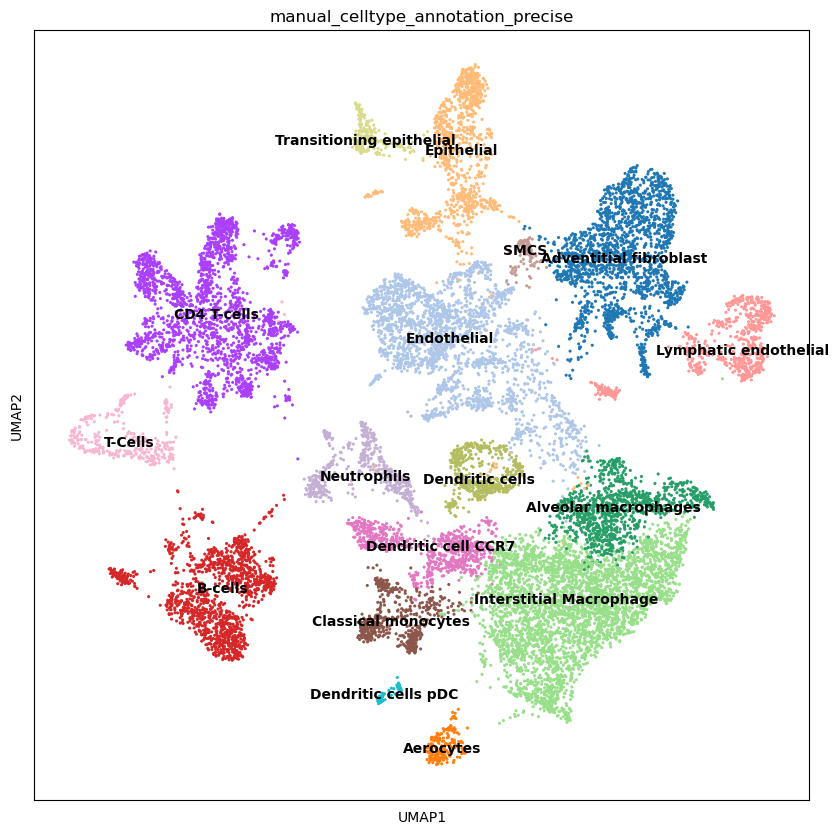

In [16]:
sc.pl.umap(adata, color="manual_celltype_annotation_precise", size = 20, legend_loc="on data")

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


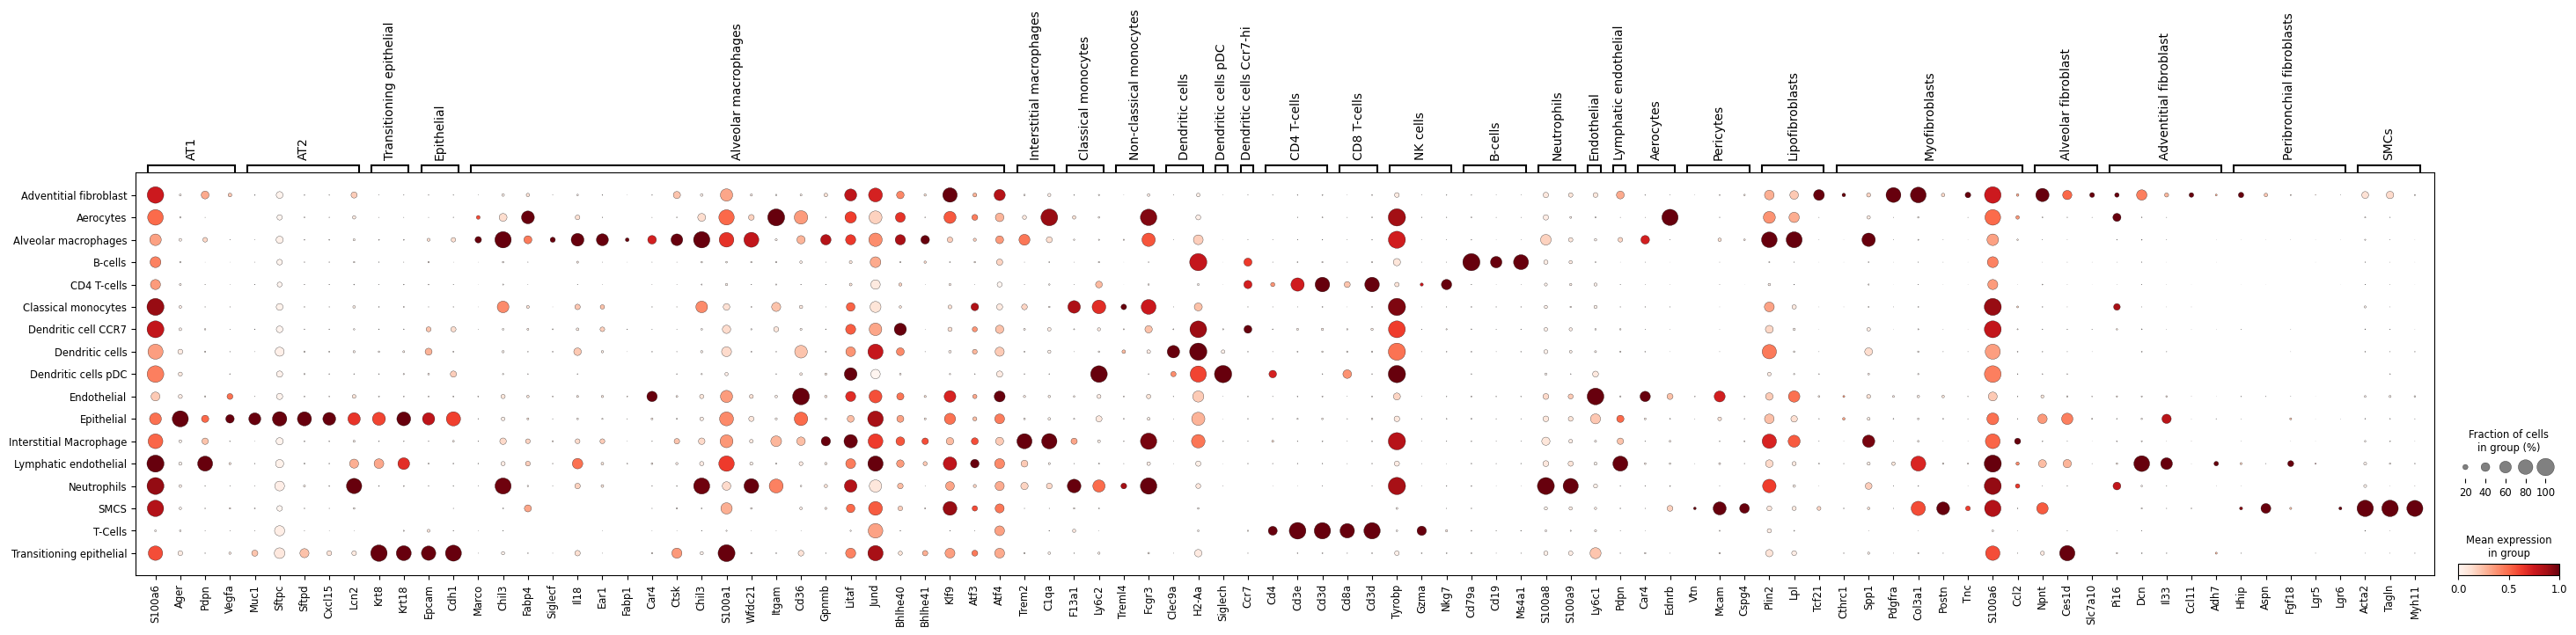

In [18]:
sc.pl.dotplot(
    adata,
    groupby="manual_celltype_annotation_precise",
    var_names=updated_marker_genes,
    standard_scale="var",
    #var_group_positions = var_group_positions
)

In [17]:
adata.write("/home/h/hollenberg/MaPra/adata_annotated.h5ad")